In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Standarized_Data/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Lab_Env_Training/"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
#DataSetPath = workingDirectory + "/DataSet_Standarization"
#DataSetPath = workingDirectory + "/DataSet_OriginalForm"
# TrainingSetPath = workingDirectory + "/DataSet/"+"TrainingSet"
#ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
#TestSetPath = workingDirectory + "/DataSet/"+"TestSet"


#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Flat_Regions",
                   workingDirectory + "/DataSet/"+"TrainingSet_Stair_Regions",]


#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "ML_Models/" + "Lab_Terrain"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/Lab_Env_Training/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#validationset_file = ValidationSetPath + "/data"+'.p'
#validationset = pickle.load(open(validationset_file,"rb"))

#testset_file = TestSetPath + "/data"+'.p'
#testset = pickle.load(open(testset_file,"rb"))

print("Set Up for Training Set")
print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
print("Pre Process Mode: ",trainingset["PreProcessMode"])

print(" ")

# print("Set Up for Validation Set")
# print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
# print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
# print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
# print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
# print("Pre Process Mode: ",validationset["PreProcessMode"])

# print(" ")

# print("Set Up for Test Set")
# print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
# print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
# print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
# print("Number of Preview Steps: ", testset["NumPreviewSteps"])
# print("Pre Process Mode: ",testset["PreProcessMode"])

y_train[3]

For dataset:  0
DataSet Sizes: 
(4, 85)
(4, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
For dataset:  1
DataSet Sizes: 
(40, 85)
(40, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(40, 85)
(40, 11)
 
Set Up for Training Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 


array([ 2.13806385e-02, -1.04110794e-01,  8.75525777e-01,  3.98341112e-03,
       -8.39044762e-02,  1.55370709e-03, -1.68361686e-05,  1.40757429e-04,
        3.00230519e-07,  5.66662861e-01,  7.08838955e-01])

In [5]:
#Test Train Split, for now No Test data
#x_train, x_test, y_train, y_test = train_test_split(dataset["input"], dataset["output"], test_size = 0.01)
# x_train = trainingset["input"]
# y_train = trainingset["output"]

# x_valid = validationset["input"]
# y_valid = validationset["output"]

# x_test = testset["input"]
# y_test = testset["output"]

#Get Left Foot to see
#x_train=x_train[::2]
#y_train=y_train[::2]


#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

print("Num of Data Points: ", x_train.shape[0])

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("X shape: ", x_train.shape)
# print("y shape: ", y_train.shape)

input dim:  85
output dim: 11
 
Num of Data Points:  40


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,)), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
from tensorflow.keras.losses import Huber

#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse') #0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=Huber(delta=3.0))


#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
history = model.fit(x = x_train, y = y_train, epochs = 5000, batch_size = 1280) #,validation_data = (x_valid, y_valid)) #1280, 1000 epoch

Epoch 1/5000
40/40 [==============================] - 1s 15ms/sample - loss: 0.1107
Epoch 2/5000
40/40 [==============================] - 0s 204us/sample - loss: 0.1048
Epoch 3/5000
40/40 [==============================] - 0s 206us/sample - loss: 0.0991
Epoch 4/5000
40/40 [==============================] - 0s 237us/sample - loss: 0.0936
Epoch 5/5000
40/40 [==============================] - 0s 152us/sample - loss: 0.0883
Epoch 6/5000
40/40 [==============================] - 0s 113us/sample - loss: 0.0832
Epoch 7/5000
40/40 [==============================] - 0s 74us/sample - loss: 0.0783
Epoch 8/5000
40/40 [==============================] - 0s 64us/sample - loss: 0.0737
Epoch 9/5000
40/40 [==============================] - 0s 52us/sample - loss: 0.0693
Epoch 10/5000
40/40 [==============================] - 0s 67us/sample - loss: 0.0651
Epoch 11/5000
40/40 [==============================] - 0s 59us/sample - loss: 0.0610
Epoch 12/5000
40/40 [==============================] - 0s 50us/sample

Epoch 96/5000
40/40 [==============================] - 0s 31us/sample - loss: 8.5326e-05
Epoch 97/5000
40/40 [==============================] - 0s 37us/sample - loss: 8.3704e-05
Epoch 98/5000
40/40 [==============================] - 0s 31us/sample - loss: 8.2105e-05
Epoch 99/5000
40/40 [==============================] - 0s 34us/sample - loss: 8.0546e-05
Epoch 100/5000
40/40 [==============================] - 0s 40us/sample - loss: 7.9089e-05
Epoch 101/5000
40/40 [==============================] - 0s 29us/sample - loss: 7.7728e-05
Epoch 102/5000
40/40 [==============================] - 0s 30us/sample - loss: 7.6479e-05
Epoch 103/5000
40/40 [==============================] - 0s 34us/sample - loss: 7.5336e-05
Epoch 104/5000
40/40 [==============================] - 0s 29us/sample - loss: 7.4279e-05
Epoch 105/5000
40/40 [==============================] - 0s 27us/sample - loss: 7.3292e-05
Epoch 106/5000
40/40 [==============================] - 0s 28us/sample - loss: 7.2375e-05
Epoch 107/5000

Epoch 188/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.4904e-05
Epoch 189/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.4646e-05
Epoch 190/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.4390e-05
Epoch 191/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.4136e-05
Epoch 192/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.3886e-05
Epoch 193/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.3639e-05
Epoch 194/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.3394e-05
Epoch 195/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.3151e-05
Epoch 196/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2910e-05
Epoch 197/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2670e-05
Epoch 198/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2434e-05
Epoch 199/

40/40 [==============================] - 0s 28us/sample - loss: 2.0083e-05
Epoch 280/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.9999e-05
Epoch 281/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.9916e-05
Epoch 282/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.9835e-05
Epoch 283/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.9753e-05
Epoch 284/5000
40/40 [==============================] - 0s 25us/sample - loss: 1.9673e-05
Epoch 285/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.9594e-05
Epoch 286/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.9515e-05
Epoch 287/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.9438e-05
Epoch 288/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.9361e-05
Epoch 289/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.9284e-05
Epoch 290/5000
40/40 [===

Epoch 371/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.4744e-05
Epoch 372/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.4703e-05
Epoch 373/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.4663e-05
Epoch 374/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.4622e-05
Epoch 375/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.4582e-05
Epoch 376/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.4542e-05
Epoch 377/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.4501e-05
Epoch 378/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.4462e-05
Epoch 379/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.4422e-05
Epoch 380/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.4383e-05
Epoch 381/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.4343e-05
Epoch 382/

Epoch 463/5000
40/40 [==============================] - 0s 31us/sample - loss: 1.1606e-05
Epoch 464/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.1578e-05
Epoch 465/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.1551e-05
Epoch 466/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.1523e-05
Epoch 467/5000
40/40 [==============================] - 0s 25us/sample - loss: 1.1495e-05
Epoch 468/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.1468e-05
Epoch 469/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.1440e-05
Epoch 470/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.1413e-05
Epoch 471/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.1386e-05
Epoch 472/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.1359e-05
Epoch 473/5000
40/40 [==============================] - 0s 25us/sample - loss: 1.1332e-05
Epoch 474/

40/40 [==============================] - 0s 28us/sample - loss: 9.4823e-06
Epoch 555/5000
40/40 [==============================] - 0s 30us/sample - loss: 9.4634e-06
Epoch 556/5000
40/40 [==============================] - 0s 33us/sample - loss: 9.4446e-06
Epoch 557/5000
40/40 [==============================] - 0s 29us/sample - loss: 9.4260e-06
Epoch 558/5000
40/40 [==============================] - 0s 31us/sample - loss: 9.4074e-06
Epoch 559/5000
40/40 [==============================] - 0s 39us/sample - loss: 9.3887e-06
Epoch 560/5000
40/40 [==============================] - 0s 31us/sample - loss: 9.3703e-06
Epoch 561/5000
40/40 [==============================] - 0s 28us/sample - loss: 9.3519e-06
Epoch 562/5000
40/40 [==============================] - 0s 30us/sample - loss: 9.3335e-06
Epoch 563/5000
40/40 [==============================] - 0s 29us/sample - loss: 9.3154e-06
Epoch 564/5000
40/40 [==============================] - 0s 28us/sample - loss: 9.2972e-06
Epoch 565/5000
40/40 [===

Epoch 646/5000
40/40 [==============================] - 0s 28us/sample - loss: 8.0730e-06
Epoch 647/5000
40/40 [==============================] - 0s 27us/sample - loss: 8.0608e-06
Epoch 648/5000
40/40 [==============================] - 0s 26us/sample - loss: 8.0487e-06
Epoch 649/5000
40/40 [==============================] - 0s 27us/sample - loss: 8.0367e-06
Epoch 650/5000
40/40 [==============================] - 0s 31us/sample - loss: 8.0247e-06
Epoch 651/5000
40/40 [==============================] - 0s 27us/sample - loss: 8.0127e-06
Epoch 652/5000
40/40 [==============================] - 0s 33us/sample - loss: 8.0006e-06
Epoch 653/5000
40/40 [==============================] - 0s 30us/sample - loss: 7.9886e-06
Epoch 654/5000
40/40 [==============================] - 0s 29us/sample - loss: 7.9770e-06
Epoch 655/5000
40/40 [==============================] - 0s 28us/sample - loss: 7.9649e-06
Epoch 656/5000
40/40 [==============================] - 0s 28us/sample - loss: 7.9536e-06
Epoch 657/

Epoch 738/5000
40/40 [==============================] - 0s 27us/sample - loss: 7.1845e-06
Epoch 739/5000
40/40 [==============================] - 0s 27us/sample - loss: 7.1773e-06
Epoch 740/5000
40/40 [==============================] - 0s 35us/sample - loss: 7.1700e-06
Epoch 741/5000
40/40 [==============================] - 0s 29us/sample - loss: 7.1629e-06
Epoch 742/5000
40/40 [==============================] - 0s 39us/sample - loss: 7.1560e-06
Epoch 743/5000
40/40 [==============================] - 0s 33us/sample - loss: 7.1491e-06
Epoch 744/5000
40/40 [==============================] - 0s 29us/sample - loss: 7.1420e-06
Epoch 745/5000
40/40 [==============================] - 0s 33us/sample - loss: 7.1350e-06
Epoch 746/5000
40/40 [==============================] - 0s 31us/sample - loss: 7.1283e-06
Epoch 747/5000
40/40 [==============================] - 0s 30us/sample - loss: 7.1215e-06
Epoch 748/5000
40/40 [==============================] - 0s 30us/sample - loss: 7.1146e-06
Epoch 749/

Epoch 830/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.6851e-06
Epoch 831/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.6817e-06
Epoch 832/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.6781e-06
Epoch 833/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.6729e-06
Epoch 834/5000
40/40 [==============================] - 0s 34us/sample - loss: 6.6689e-06
Epoch 835/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.6677e-06
Epoch 836/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.6634e-06
Epoch 837/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.6577e-06
Epoch 838/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.6545e-06
Epoch 839/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.6512e-06
Epoch 840/5000
40/40 [==============================] - 0s 37us/sample - loss: 6.6473e-06
Epoch 841/

40/40 [==============================] - 0s 32us/sample - loss: 6.4163e-06
Epoch 922/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.4149e-06
Epoch 923/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.4119e-06
Epoch 924/5000
40/40 [==============================] - 0s 26us/sample - loss: 6.4085e-06
Epoch 925/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.4069e-06
Epoch 926/5000
40/40 [==============================] - 0s 31us/sample - loss: 6.4044e-06
Epoch 927/5000
40/40 [==============================] - 0s 33us/sample - loss: 6.4028e-06
Epoch 928/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.4014e-06
Epoch 929/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.3988e-06
Epoch 930/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.3956e-06
Epoch 931/5000
40/40 [==============================] - 0s 26us/sample - loss: 6.3953e-06
Epoch 932/5000
40/40 [===

40/40 [==============================] - 0s 38us/sample - loss: 6.2617e-06
Epoch 1013/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.2607e-06
Epoch 1014/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.2593e-06
Epoch 1015/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.2577e-06
Epoch 1016/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.2566e-06
Epoch 1017/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.2550e-06
Epoch 1018/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.2543e-06
Epoch 1019/5000
40/40 [==============================] - 0s 33us/sample - loss: 6.2535e-06
Epoch 1020/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.2523e-06
Epoch 1021/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.2504e-06
Epoch 1022/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.2486e-06
Epoch 1023/5000

Epoch 1103/5000
40/40 [==============================] - 0s 26us/sample - loss: 6.1612e-06
Epoch 1104/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.1601e-06
Epoch 1105/5000
40/40 [==============================] - 0s 31us/sample - loss: 6.1586e-06
Epoch 1106/5000
40/40 [==============================] - 0s 36us/sample - loss: 6.1584e-06
Epoch 1107/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.1581e-06
Epoch 1108/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.1553e-06
Epoch 1109/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.1547e-06
Epoch 1110/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.1538e-06
Epoch 1111/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.1526e-06
Epoch 1112/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.1525e-06
Epoch 1113/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.1508e-06

Epoch 1194/5000
40/40 [==============================] - 0s 33us/sample - loss: 6.0802e-06
Epoch 1195/5000
40/40 [==============================] - 0s 34us/sample - loss: 6.0803e-06
Epoch 1196/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.0786e-06
Epoch 1197/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.0782e-06
Epoch 1198/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.0772e-06
Epoch 1199/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.0765e-06
Epoch 1200/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.0759e-06
Epoch 1201/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.0747e-06
Epoch 1202/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.0744e-06
Epoch 1203/5000
40/40 [==============================] - 0s 41us/sample - loss: 6.0739e-06
Epoch 1204/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.0726e-06

40/40 [==============================] - 0s 26us/sample - loss: 6.0092e-06
Epoch 1285/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.0078e-06
Epoch 1286/5000
40/40 [==============================] - 0s 28us/sample - loss: 6.0078e-06
Epoch 1287/5000
40/40 [==============================] - 0s 35us/sample - loss: 6.0064e-06
Epoch 1288/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.0056e-06
Epoch 1289/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.0052e-06
Epoch 1290/5000
40/40 [==============================] - 0s 29us/sample - loss: 6.0041e-06
Epoch 1291/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.0030e-06
Epoch 1292/5000
40/40 [==============================] - 0s 30us/sample - loss: 6.0031e-06
Epoch 1293/5000
40/40 [==============================] - 0s 26us/sample - loss: 6.0015e-06
Epoch 1294/5000
40/40 [==============================] - 0s 27us/sample - loss: 6.0009e-06
Epoch 1295/5000

Epoch 1375/5000
40/40 [==============================] - 0s 25us/sample - loss: 5.9378e-06
Epoch 1376/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.9364e-06
Epoch 1377/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.9359e-06
Epoch 1378/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.9351e-06
Epoch 1379/5000
40/40 [==============================] - 0s 25us/sample - loss: 5.9340e-06
Epoch 1380/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.9336e-06
Epoch 1381/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.9325e-06
Epoch 1382/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.9319e-06
Epoch 1383/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.9311e-06
Epoch 1384/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.9301e-06
Epoch 1385/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.9294e-06

Epoch 1466/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.8654e-06
Epoch 1467/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.8644e-06
Epoch 1468/5000
40/40 [==============================] - 0s 31us/sample - loss: 5.8644e-06
Epoch 1469/5000
40/40 [==============================] - 0s 31us/sample - loss: 5.8628e-06
Epoch 1470/5000
40/40 [==============================] - 0s 33us/sample - loss: 5.8627e-06
Epoch 1471/5000
40/40 [==============================] - 0s 37us/sample - loss: 5.8615e-06
Epoch 1472/5000
40/40 [==============================] - 0s 38us/sample - loss: 5.8604e-06
Epoch 1473/5000
40/40 [==============================] - 0s 38us/sample - loss: 5.8604e-06
Epoch 1474/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.8588e-06
Epoch 1475/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.8582e-06
Epoch 1476/5000
40/40 [==============================] - 0s 36us/sample - loss: 5.8574e-06

Epoch 1557/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.7913e-06
Epoch 1558/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.7903e-06
Epoch 1559/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.7899e-06
Epoch 1560/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.7889e-06
Epoch 1561/5000
40/40 [==============================] - 0s 32us/sample - loss: 5.7881e-06
Epoch 1562/5000
40/40 [==============================] - 0s 39us/sample - loss: 5.7872e-06
Epoch 1563/5000
40/40 [==============================] - 0s 43us/sample - loss: 5.7861e-06
Epoch 1564/5000
40/40 [==============================] - 0s 44us/sample - loss: 5.7862e-06
Epoch 1565/5000
40/40 [==============================] - 0s 43us/sample - loss: 5.7845e-06
Epoch 1566/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.7839e-06
Epoch 1567/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.7829e-06

40/40 [==============================] - 0s 31us/sample - loss: 5.7155e-06
Epoch 1648/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.7146e-06
Epoch 1649/5000
40/40 [==============================] - 0s 37us/sample - loss: 5.7138e-06
Epoch 1650/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.7128e-06
Epoch 1651/5000
40/40 [==============================] - 0s 31us/sample - loss: 5.7118e-06
Epoch 1652/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.7119e-06
Epoch 1653/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.7101e-06
Epoch 1654/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.7096e-06
Epoch 1655/5000
40/40 [==============================] - 0s 35us/sample - loss: 5.7086e-06
Epoch 1656/5000
40/40 [==============================] - 0s 39us/sample - loss: 5.7075e-06
Epoch 1657/5000
40/40 [==============================] - 0s 39us/sample - loss: 5.7078e-06
Epoch 1658/5000

Epoch 1738/5000
40/40 [==============================] - 0s 35us/sample - loss: 5.6380e-06
Epoch 1739/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.6371e-06
Epoch 1740/5000
40/40 [==============================] - 0s 34us/sample - loss: 5.6355e-06
Epoch 1741/5000
40/40 [==============================] - 0s 34us/sample - loss: 5.6343e-06
Epoch 1742/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.6338e-06
Epoch 1743/5000
40/40 [==============================] - 0s 31us/sample - loss: 5.6324e-06
Epoch 1744/5000
40/40 [==============================] - 0s 36us/sample - loss: 5.6313e-06
Epoch 1745/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.6309e-06
Epoch 1746/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.6295e-06
Epoch 1747/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.6288e-06
Epoch 1748/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.6281e-06

Epoch 1829/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.5540e-06
Epoch 1830/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.5531e-06
Epoch 1831/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.5522e-06
Epoch 1832/5000
40/40 [==============================] - 0s 32us/sample - loss: 5.5514e-06
Epoch 1833/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.5502e-06
Epoch 1834/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.5494e-06
Epoch 1835/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.5483e-06
Epoch 1836/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.5483e-06
Epoch 1837/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.5464e-06
Epoch 1838/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.5458e-06
Epoch 1839/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.5448e-06

Epoch 1920/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.4680e-06
Epoch 1921/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.4665e-06
Epoch 1922/5000
40/40 [==============================] - 0s 32us/sample - loss: 5.4656e-06
Epoch 1923/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.4646e-06
Epoch 1924/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.4639e-06
Epoch 1925/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.4630e-06
Epoch 1926/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.4623e-06
Epoch 1927/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.4608e-06
Epoch 1928/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.4600e-06
Epoch 1929/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.4589e-06
Epoch 1930/5000
40/40 [==============================] - 0s 26us/sample - loss: 5.4582e-06

40/40 [==============================] - 0s 28us/sample - loss: 5.3787e-06
Epoch 2011/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.3775e-06
Epoch 2012/5000
40/40 [==============================] - 0s 32us/sample - loss: 5.3765e-06
Epoch 2013/5000
40/40 [==============================] - 0s 33us/sample - loss: 5.3764e-06
Epoch 2014/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.3754e-06
Epoch 2015/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.3741e-06
Epoch 2016/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.3735e-06
Epoch 2017/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.3721e-06
Epoch 2018/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.3711e-06
Epoch 2019/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.3701e-06
Epoch 2020/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.3686e-06
Epoch 2021/5000

Epoch 2101/5000
40/40 [==============================] - 0s 34us/sample - loss: 5.2885e-06
Epoch 2102/5000
40/40 [==============================] - 0s 30us/sample - loss: 5.2870e-06
Epoch 2103/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2860e-06
Epoch 2104/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2843e-06
Epoch 2105/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2838e-06
Epoch 2106/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2828e-06
Epoch 2107/5000
40/40 [==============================] - 0s 29us/sample - loss: 5.2817e-06
Epoch 2108/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2808e-06
Epoch 2109/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.2792e-06
Epoch 2110/5000
40/40 [==============================] - 0s 28us/sample - loss: 5.2789e-06
Epoch 2111/5000
40/40 [==============================] - 0s 27us/sample - loss: 5.2769e-06

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 2581/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.7320e-06
Epoch 2582/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.7309e-06
Epoch 2583/5000
40/40 [==============================] - 0s 33us/sample - loss: 4.7302e-06
Epoch 2584/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.7282e-06
Epoch 2585/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.7272e-06
Epoch 2586/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.7258e-06
Epoch 2587/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.7248e-06
Epoch 2588/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.7234e-06
Epoch 2589/5000
40/40 [==============================] - 0s 25us/sample - loss: 4.7222e-06
Epoch 2590/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.7216e-06
Epoch 2591/5000
40/40 [==============================] - 0s 26us/sample - loss: 4.7203e-06

40/40 [==============================] - 0s 30us/sample - loss: 4.6197e-06
Epoch 2672/5000
40/40 [==============================] - 0s 35us/sample - loss: 4.6196e-06
Epoch 2673/5000
40/40 [==============================] - 0s 31us/sample - loss: 4.6171e-06
Epoch 2674/5000
40/40 [==============================] - 0s 26us/sample - loss: 4.6174e-06
Epoch 2675/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.6156e-06
Epoch 2676/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.6140e-06
Epoch 2677/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.6127e-06
Epoch 2678/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.6114e-06
Epoch 2679/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.6101e-06
Epoch 2680/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.6087e-06
Epoch 2681/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.6077e-06
Epoch 2682/5000

Epoch 2762/5000
40/40 [==============================] - 0s 26us/sample - loss: 4.5032e-06
Epoch 2763/5000
40/40 [==============================] - 0s 26us/sample - loss: 4.5013e-06
Epoch 2764/5000
40/40 [==============================] - 0s 30us/sample - loss: 4.5002e-06
Epoch 2765/5000
40/40 [==============================] - 0s 32us/sample - loss: 4.4989e-06
Epoch 2766/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.4972e-06
Epoch 2767/5000
40/40 [==============================] - 0s 33us/sample - loss: 4.4959e-06
Epoch 2768/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.4947e-06
Epoch 2769/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.4938e-06
Epoch 2770/5000
40/40 [==============================] - 0s 31us/sample - loss: 4.4925e-06
Epoch 2771/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.4906e-06
Epoch 2772/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.4911e-06

Epoch 2853/5000
40/40 [==============================] - 0s 30us/sample - loss: 4.3818e-06
Epoch 2854/5000
40/40 [==============================] - 0s 30us/sample - loss: 4.3805e-06
Epoch 2855/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.3790e-06
Epoch 2856/5000
40/40 [==============================] - 0s 89us/sample - loss: 4.3780e-06
Epoch 2857/5000
40/40 [==============================] - 0s 32us/sample - loss: 4.3762e-06
Epoch 2858/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.3749e-06
Epoch 2859/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.3739e-06
Epoch 2860/5000
40/40 [==============================] - 0s 25us/sample - loss: 4.3719e-06
Epoch 2861/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.3711e-06
Epoch 2862/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.3706e-06
Epoch 2863/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.3680e-06

40/40 [==============================] - 0s 40us/sample - loss: 4.2558e-06
Epoch 2944/5000
40/40 [==============================] - 0s 36us/sample - loss: 4.2535e-06
Epoch 2945/5000
40/40 [==============================] - 0s 40us/sample - loss: 4.2515e-06
Epoch 2946/5000
40/40 [==============================] - 0s 37us/sample - loss: 4.2518e-06
Epoch 2947/5000
40/40 [==============================] - 0s 30us/sample - loss: 4.2483e-06
Epoch 2948/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.2491e-06
Epoch 2949/5000
40/40 [==============================] - 0s 27us/sample - loss: 4.2473e-06
Epoch 2950/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.2442e-06
Epoch 2951/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.2453e-06
Epoch 2952/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.2424e-06
Epoch 2953/5000
40/40 [==============================] - 0s 36us/sample - loss: 4.2412e-06
Epoch 2954/5000

Epoch 3034/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.1266e-06
Epoch 3035/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.1269e-06
Epoch 3036/5000
40/40 [==============================] - 0s 31us/sample - loss: 4.1243e-06
Epoch 3037/5000
40/40 [==============================] - 0s 28us/sample - loss: 4.1241e-06
Epoch 3038/5000
40/40 [==============================] - 0s 34us/sample - loss: 4.1222e-06
Epoch 3039/5000
40/40 [==============================] - 0s 34us/sample - loss: 4.1213e-06
Epoch 3040/5000
40/40 [==============================] - 0s 34us/sample - loss: 4.1187e-06
Epoch 3041/5000
40/40 [==============================] - 0s 44us/sample - loss: 4.1196e-06
Epoch 3042/5000
40/40 [==============================] - 0s 31us/sample - loss: 4.1173e-06
Epoch 3043/5000
40/40 [==============================] - 0s 29us/sample - loss: 4.1152e-06
Epoch 3044/5000
40/40 [==============================] - 0s 34us/sample - loss: 4.1159e-06

Epoch 3125/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.9960e-06
Epoch 3126/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.9935e-06
Epoch 3127/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.9927e-06
Epoch 3128/5000
40/40 [==============================] - 0s 36us/sample - loss: 3.9909e-06
Epoch 3129/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.9889e-06
Epoch 3130/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.9872e-06
Epoch 3131/5000
40/40 [==============================] - 0s 31us/sample - loss: 3.9868e-06
Epoch 3132/5000
40/40 [==============================] - 0s 31us/sample - loss: 3.9842e-06
Epoch 3133/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.9843e-06
Epoch 3134/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.9823e-06
Epoch 3135/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.9805e-06

40/40 [==============================] - 0s 34us/sample - loss: 3.8624e-06
Epoch 3216/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.8619e-06
Epoch 3217/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.8595e-06
Epoch 3218/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.8592e-06
Epoch 3219/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.8577e-06
Epoch 3220/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.8548e-06
Epoch 3221/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.8556e-06
Epoch 3222/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.8521e-06
Epoch 3223/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.8507e-06
Epoch 3224/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.8502e-06
Epoch 3225/5000
40/40 [==============================] - 0s 35us/sample - loss: 3.8479e-06
Epoch 3226/5000

Epoch 3306/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.7236e-06
Epoch 3307/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.7222e-06
Epoch 3308/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.7213e-06
Epoch 3309/5000
40/40 [==============================] - 0s 25us/sample - loss: 3.7197e-06
Epoch 3310/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.7185e-06
Epoch 3311/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.7161e-06
Epoch 3312/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.7147e-06
Epoch 3313/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.7133e-06
Epoch 3314/5000
40/40 [==============================] - 0s 33us/sample - loss: 3.7114e-06
Epoch 3315/5000
40/40 [==============================] - 0s 38us/sample - loss: 3.7111e-06
Epoch 3316/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.7084e-06

40/40 [==============================] - 0s 34us/sample - loss: 3.5822e-06
Epoch 3397/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.5802e-06
Epoch 3398/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.5800e-06
Epoch 3399/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.5774e-06
Epoch 3400/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.5770e-06
Epoch 3401/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.5753e-06
Epoch 3402/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.5735e-06
Epoch 3403/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.5724e-06
Epoch 3404/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.5704e-06
Epoch 3405/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.5697e-06
Epoch 3406/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.5674e-06
Epoch 3407/5000

Epoch 3487/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.4411e-06
Epoch 3488/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.4402e-06
Epoch 3489/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.4379e-06
Epoch 3490/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.4367e-06
Epoch 3491/5000
40/40 [==============================] - 0s 25us/sample - loss: 3.4350e-06
Epoch 3492/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.4335e-06
Epoch 3493/5000
40/40 [==============================] - 0s 37us/sample - loss: 3.4314e-06
Epoch 3494/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.4298e-06
Epoch 3495/5000
40/40 [==============================] - 0s 34us/sample - loss: 3.4284e-06
Epoch 3496/5000
40/40 [==============================] - 0s 35us/sample - loss: 3.4272e-06
Epoch 3497/5000
40/40 [==============================] - 0s 31us/sample - loss: 3.4251e-06

40/40 [==============================] - 0s 27us/sample - loss: 3.2952e-06
Epoch 3578/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.2933e-06
Epoch 3579/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2929e-06
Epoch 3580/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.2906e-06
Epoch 3581/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2893e-06
Epoch 3582/5000
40/40 [==============================] - 0s 32us/sample - loss: 3.2873e-06
Epoch 3583/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2851e-06
Epoch 3584/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.2852e-06
Epoch 3585/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.2837e-06
Epoch 3586/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.2810e-06
Epoch 3587/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.2800e-06
Epoch 3588/5000

Epoch 3668/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.1543e-06
Epoch 3669/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.1521e-06
Epoch 3670/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.1513e-06
Epoch 3671/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.1495e-06
Epoch 3672/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.1479e-06
Epoch 3673/5000
40/40 [==============================] - 0s 35us/sample - loss: 3.1467e-06
Epoch 3674/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.1442e-06
Epoch 3675/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.1441e-06
Epoch 3676/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.1411e-06
Epoch 3677/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.1401e-06
Epoch 3678/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.1384e-06

40/40 [==============================] - 0s 27us/sample - loss: 3.0159e-06
Epoch 3759/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.0139e-06
Epoch 3760/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.0117e-06
Epoch 3761/5000
40/40 [==============================] - 0s 26us/sample - loss: 3.0131e-06
Epoch 3762/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.0095e-06
Epoch 3763/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.0095e-06
Epoch 3764/5000
40/40 [==============================] - 0s 27us/sample - loss: 3.0079e-06
Epoch 3765/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.0064e-06
Epoch 3766/5000
40/40 [==============================] - 0s 30us/sample - loss: 3.0059e-06
Epoch 3767/5000
40/40 [==============================] - 0s 29us/sample - loss: 3.0014e-06
Epoch 3768/5000
40/40 [==============================] - 0s 28us/sample - loss: 3.0023e-06
Epoch 3769/5000

Epoch 3849/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.8793e-06
Epoch 3850/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.8780e-06
Epoch 3851/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.8762e-06
Epoch 3852/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.8758e-06
Epoch 3853/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.8723e-06
Epoch 3854/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.8710e-06
Epoch 3855/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.8707e-06
Epoch 3856/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.8674e-06
Epoch 3857/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.8674e-06
Epoch 3858/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.8653e-06
Epoch 3859/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.8650e-06

40/40 [==============================] - 0s 27us/sample - loss: 2.7483e-06
Epoch 3940/5000
40/40 [==============================] - 0s 34us/sample - loss: 2.7464e-06
Epoch 3941/5000
40/40 [==============================] - 0s 25us/sample - loss: 2.7446e-06
Epoch 3942/5000
40/40 [==============================] - 0s 25us/sample - loss: 2.7437e-06
Epoch 3943/5000
40/40 [==============================] - 0s 33us/sample - loss: 2.7425e-06
Epoch 3944/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.7412e-06
Epoch 3945/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.7390e-06
Epoch 3946/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.7378e-06
Epoch 3947/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.7363e-06
Epoch 3948/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.7359e-06
Epoch 3949/5000
40/40 [==============================] - 0s 25us/sample - loss: 2.7346e-06
Epoch 3950/5000

Epoch 4030/5000
40/40 [==============================] - 0s 36us/sample - loss: 2.6226e-06
Epoch 4031/5000
40/40 [==============================] - 0s 42us/sample - loss: 2.6212e-06
Epoch 4032/5000
40/40 [==============================] - 0s 36us/sample - loss: 2.6194e-06
Epoch 4033/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.6177e-06
Epoch 4034/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.6158e-06
Epoch 4035/5000
40/40 [==============================] - 0s 30us/sample - loss: 2.6149e-06
Epoch 4036/5000
40/40 [==============================] - 0s 30us/sample - loss: 2.6132e-06
Epoch 4037/5000
40/40 [==============================] - 0s 30us/sample - loss: 2.6125e-06
Epoch 4038/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.6125e-06
Epoch 4039/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.6092e-06
Epoch 4040/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.6090e-06

40/40 [==============================] - 0s 27us/sample - loss: 2.5051e-06
Epoch 4121/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.5022e-06
Epoch 4122/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.5023e-06
Epoch 4123/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.5039e-06
Epoch 4124/5000
40/40 [==============================] - 0s 36us/sample - loss: 2.5018e-06
Epoch 4125/5000
40/40 [==============================] - 0s 41us/sample - loss: 2.4968e-06
Epoch 4126/5000
40/40 [==============================] - 0s 39us/sample - loss: 2.4971e-06
Epoch 4127/5000
40/40 [==============================] - 0s 38us/sample - loss: 2.4952e-06
Epoch 4128/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.4935e-06
Epoch 4129/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.4922e-06
Epoch 4130/5000
40/40 [==============================] - 0s 25us/sample - loss: 2.4922e-06
Epoch 4131/5000

Epoch 4211/5000
40/40 [==============================] - 0s 32us/sample - loss: 2.3784e-06
Epoch 4212/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.3780e-06
Epoch 4213/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.3765e-06
Epoch 4214/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.3752e-06
Epoch 4215/5000
40/40 [==============================] - 0s 31us/sample - loss: 2.3733e-06
Epoch 4216/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.3728e-06
Epoch 4217/5000
40/40 [==============================] - 0s 32us/sample - loss: 2.3714e-06
Epoch 4218/5000
40/40 [==============================] - 0s 34us/sample - loss: 2.3699e-06
Epoch 4219/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.3682e-06
Epoch 4220/5000
40/40 [==============================] - 0s 32us/sample - loss: 2.3674e-06
Epoch 4221/5000
40/40 [==============================] - 0s 36us/sample - loss: 2.3664e-06

Epoch 4302/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.2739e-06
Epoch 4303/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.2772e-06
Epoch 4304/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.2781e-06
Epoch 4305/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.2783e-06
Epoch 4306/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.2728e-06
Epoch 4307/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.2664e-06
Epoch 4308/5000
40/40 [==============================] - 0s 31us/sample - loss: 2.2664e-06
Epoch 4309/5000
40/40 [==============================] - 0s 30us/sample - loss: 2.2696e-06
Epoch 4310/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.2699e-06
Epoch 4311/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.2675e-06
Epoch 4312/5000
40/40 [==============================] - 0s 36us/sample - loss: 2.2625e-06

40/40 [==============================] - 0s 31us/sample - loss: 2.1808e-06
Epoch 4393/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.1806e-06
Epoch 4394/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.1769e-06
Epoch 4395/5000
40/40 [==============================] - 0s 28us/sample - loss: 2.1724e-06
Epoch 4396/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.1693e-06
Epoch 4397/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.1692e-06
Epoch 4398/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.1690e-06
Epoch 4399/5000
40/40 [==============================] - 0s 26us/sample - loss: 2.1689e-06
Epoch 4400/5000
40/40 [==============================] - 0s 27us/sample - loss: 2.1693e-06
Epoch 4401/5000
40/40 [==============================] - 0s 29us/sample - loss: 2.1685e-06
Epoch 4402/5000
40/40 [==============================] - 0s 31us/sample - loss: 2.1680e-06
Epoch 4403/5000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 4915/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.8073e-06
Epoch 4916/5000
40/40 [==============================] - 0s 27us/sample - loss: 1.8139e-06
Epoch 4917/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.8186e-06
Epoch 4918/5000
40/40 [==============================] - 0s 28us/sample - loss: 1.8235e-06
Epoch 4919/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.8241e-06
Epoch 4920/5000
40/40 [==============================] - 0s 33us/sample - loss: 1.8214e-06
Epoch 4921/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.8127e-06
Epoch 4922/5000
40/40 [==============================] - 0s 29us/sample - loss: 1.8043e-06
Epoch 4923/5000
40/40 [==============================] - 0s 33us/sample - loss: 1.7943e-06
Epoch 4924/5000
40/40 [==============================] - 0s 30us/sample - loss: 1.7854e-06
Epoch 4925/5000
40/40 [==============================] - 0s 26us/sample - loss: 1.7777e-06

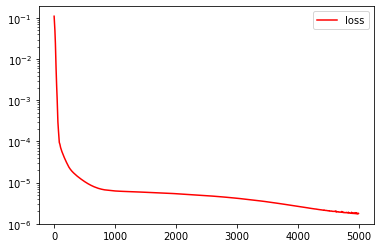

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.show()

In [9]:
#Save Trained Model
MLmodel_name = "NN_Model"#_Valid_" + trainingset["PreProcessMode"]
model.save(ML_Model_Path + '/' + MLmodel_name + '.h5')
#model.save(ML_Model_Path + MLmodel_name, save_format='tf')

In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + '/datasetSettings' +'.p', "wb"))

In [11]:
### Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 2
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.82519579e-02  9.32756102e-02  8.79650152e-01  1.98166569e-02
 -4.30876297e-02  8.84087587e-05 -7.71919312e-03  1.29411749e-03
  3.79011234e-06 -3.99997468e-02  1.93855294e-01  0.00000000e+00
  1.00000000e+00  1.30000075e-01  3.87986312e-01  0.00000000e+00
 -1.69999925e-01  3.87986312e-01  0.00000000e+00 -1.69999925e-01
  8.79863121e-02  0.00000000e+00  1.30000075e-01  8.79863121e-02
  0.00000000e+00  1.30000075e-01  8.79863121e-02  0.00000000e+00
 -1.69999925e-01  8.79863121e-02  0.00000000e+00 -1.69999925e-01
 -2.12013688e-01  0.00000000e+00  1.30000075e-01 -2.12013688e-01
  0.00000000e+00  4.30000075e-01  3.87986312e-01  0.00000000e+00
  1.30000075e-01  3.87986312e-01  0.00000000e+00  1.30000075e-01
  8.79863121e-02  0.00000000e+00  4.30000075e-01  8.79863121e-02
  0.00000000e+00  4.30000075e-01  8.79863121e-02  0.00000000e+00
  1.30000075e-01  8.79863121e-02  0.00000000e+00  1.30000075e-01
 -2.12013688e-01  0.00000000e+00  4.30000075e-01 -2.12013688e-01
  0.00000000e+00  7.30000

Data Kept Original Form, But need to scale back to meters
[0.00048873 0.00074985 0.00128636 0.00135379 0.00138839 0.00143526
 0.00145485 0.00148639 0.00157446 0.0016075  0.00166802 0.00175491
 0.00218528 0.00237451 0.00266925 0.00326592 0.00328444 0.00331878
 0.00355019 0.00360501 0.00365753 0.00370176 0.00377879 0.00401
 0.00402876 0.00406767 0.00426067 0.00495252 0.00499551 0.0050064
 0.00520585 0.00557237 0.00561228 0.00587899 0.00659057 0.00670093
 0.0068094  0.00786607 0.00863855 0.01024417]
Error Mean:  0.003802017158440268
Error Std 0.0022594147475095364


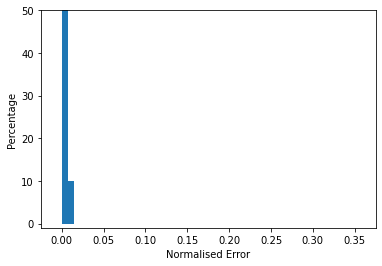

In [12]:
#Error Stat with Training Set
import matplotlib.pyplot as plt

y_pred_train = model.predict(x_train)


if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_train_originalform-y_pred_train_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-300:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

In [13]:
# #Error Stat with Validation Set

# y_pred_valid = model.predict(x_valid)


# if validationset["PreProcessMode"] == "OriginalForm":
#     print("Data Kept Original Form, But need to scale back to meters")
#     y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
#     y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
# elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
#     print("PreProcessing of: ", validationset["PreProcessMode"])
#     y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
#     y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
# else:
#     raise Exception("Unknow Pre Process Mode")

# #Compute Error
# err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

# #Plot Histogram
# fig=plt.figure();   ax = fig.gca()
# plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
# ax.set_xlabel("Normalised Error")
# ax.set_xlim([-0.025,0.375])
# ax.set_ylabel("Percentage")
# ax.set_ylim([-1,50])

# #### Sort the error

# err_sorted = np.sort(err)
# print(err_sorted)  # print the 100 biggest error

# print("Error Mean: ", err_sorted.mean())
# print("Error Std", err_sorted.std())

In [14]:
# #Error Stat with Test Set

# y_pred_test = model.predict(x_test)


# if testset["PreProcessMode"] == "OriginalForm":
#     print("Data Kept Original Form, But need to scale back to meters")
#     y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
#     y_true_test_originalform = y_test/testset["VectorScaleFactor"]
# elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
#     print("PreProcessing of: ", validationset["PreProcessMode"])
#     y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
#     y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
# else:
#     raise Exception("Unknow Pre Process Mode")

# #Compute Error
# err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

# #Plot Histogram
# fig=plt.figure();   ax = fig.gca()
# plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
# ax.set_xlabel("Normalised Error")
# ax.set_xlim([-0.025,0.375])
# ax.set_ylabel("Percentage")
# ax.set_ylim([-1,50])

# #### Sort the error

# err_sorted = np.sort(err)
# print(err_sorted)  # print the 100 biggest error

# print("Error Mean: ", err_sorted.mean())
# print("Error Std", err_sorted.std())